# 1. Import Necessary libraries

In [5]:
from keras.datasets import mnist
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Sequential

import numpy as np
from matplotlib import pyplot as plt

## 2. Import Dataset

In [6]:
(X_train,_),(X_test,_) = mnist.load_data()

## 3. Data Understanding

In [7]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

## 4. Data Preprocessing

In [8]:
X_train = X_train.astype('float')/255
X_test  = X_test.astype('float')/255

In [9]:
X_train_reshaped = np.reshape(a = X_train,newshape = (60000, 28, 28,1))
X_test_reshaped = np.reshape(a = X_test,newshape  = (10000, 28, 28,1))
X_train_reshaped.shape,X_test_reshaped.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### NOTE: 

**Add some noises to these train and test images for Noise reduction using Encoder and Decoder blocks.**

### Before Adding Noise

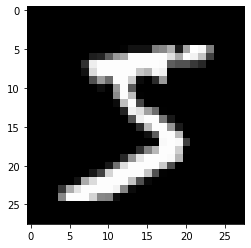

In [21]:
plt.imshow(X_train[0],cmap = 'gray')
plt.show()

### Step1 : Add Noise

In [37]:
X_train_noisy = X_train_reshaped + 0.2 * np.random.normal(loc = 0.0,scale = 1.0, size = (60000,28,28,1))
X_test_noisy = X_test_reshaped  + 0.2 * np.random.normal(loc = 0.0,scale = 1.0, size  = (10000,28,28,1))

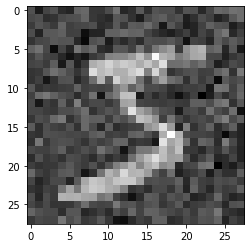

In [25]:
plt.imshow(X_train_noisy[0],cmap = 'gray')
plt.show()

### Step2: Clip your image

In [41]:
X_train_clipped = np.clip(a = X_train_noisy, a_min = 0, a_max =3)
X_test_clipped  = np.clip(a = X_test_noisy,  a_min = 0, a_max =3)

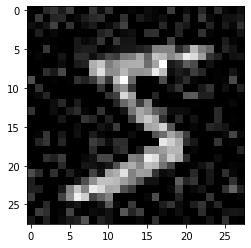

In [39]:
plt.imshow(X_train_clipped[0],cmap = 'gray')
plt.show()

## 5. Model Building

### Encoding Architecture

In [56]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1),filters = 32,kernel_size = (3,3),padding = 'same',strides = 1,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2))
model.add(Conv2D(filters = 8,kernel_size = (3,3),padding = 'same',strides = 1,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2))
model.add(Conv2D(filters = 8,kernel_size = (3,3),padding = 'same',strides = 1,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'same'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 4, 4, 8)         

### Decoding Architecture

In [57]:
model.add(Conv2D(filters = 8,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(UpSampling2D(size = (2,2)))
model.add(Conv2D(filters = 8,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(UpSampling2D(size = (2,2)))
model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu'))
model.add(UpSampling2D(size = (2,2)))
model.add(Conv2D(filters = 1,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 4, 4, 8)         

In [58]:
model.compile(optimizer='rmsprop',loss=['mean_squared_error'])

## 6. Model Training

In [59]:
model.fit(x=X_train_clipped,y=X_train,epochs=5, batch_size=32, validation_data=(X_test_clipped, X_test))

Epoch 1/5
1875/1875 [==============================] - 156s 82ms/step - loss: 0.0326 - val_loss: 0.0251
Epoch 2/5
1875/1875 [==============================] - 149s 80ms/step - loss: 0.0209 - val_loss: 0.0187
Epoch 3/5
1875/1875 [==============================] - 147s 78ms/step - loss: 0.0181 - val_loss: 0.0158
Epoch 4/5
1875/1875 [==============================] - 140s 75ms/step - loss: 0.0166 - val_loss: 0.0147
Epoch 5/5
1875/1875 [==============================] - 137s 73ms/step - loss: 0.0155 - val_loss: 0.0140


## 7. Model Evaluation

In [60]:
model.evaluate(X_test_noisy,X_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.0154


0.015358268283307552

## 8. Model Prediction

In [61]:
y_pred = model.predict(X_test_noisy)

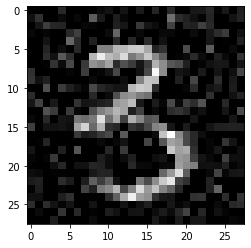

In [63]:
plt.imshow(X_test_clipped[5000],cmap = 'gray')
plt.show()

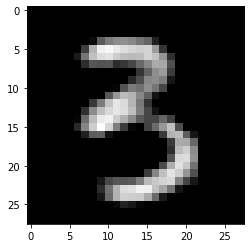

In [64]:
plt.imshow(y_pred[5000],cmap = 'gray')
plt.show()

## 8. Model Deployement

In [65]:
model.save('Denoising_images.h5')

## THE END!!